<a href="https://colab.research.google.com/github/shravanigadige09/employees-bunrout/blob/main/Finding_Burn_rate_ML_Model_developed_by_SHRAVANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# for manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for preprocessing
from sklearn import preprocessing

# for spliting dataset
from sklearn.model_selection import train_test_split

# for dimension re
from sklearn.decomposition import PCA

# for calucating accuracy score
from sklearn.metrics import r2_score

# Algorithm
from sklearn.ensemble import RandomForestRegressor

Reading the dataset and understanding

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

covert data object into data time type

In [ ]:
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

**Removing the null values**
- we will replace the null value with mean value of that column

In [ ]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df["Resource Allocation"].fillna(df["Resource Allocation"].mean(),inplace = True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(),inplace = True)
df["Burn Rate"].fillna(df["Burn Rate"].mean(),inplace = True)

In [ ]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

**Removing unwanted columns**
- here we can remove ID columns

In [ ]:
df = df.drop(['Employee ID'],axis = 1)

**Checking skewness in our features or columns**

In [ ]:
# finding skewness in our numercial columns
print(df["Designation"].skew(), "-> Normally distributed")
print(df["Resource Allocation"].skew(),"-> positively Skewed")
print(df["Mental Fatigue Score"].skew(),"-> negtively skewed")
print(df["Burn Rate"].skew(),"-> Normally distributed")

0.09242138478903683 -> Normally distributed
0.2110787436948646 -> positively Skewed
-0.45245780687704834 -> negtively skewed
0.046910742768045674 -> Normally distributed


**seeing the correlation between every columns**

In [ ]:
df.corr()

Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.852046              0.656445   
Resource Allocation      0.852046             1.000000              0.739268   
Mental Fatigue Score     0.656445             0.739268              1.000000   
Burn Rate                0.719284             0.811062              0.878217   

                      Burn Rate  
Designation            0.719284  
Resource Allocation    0.811062  
Mental Fatigue Score   0.878217  
Burn Rate              1.000000

**Visualizating the columns**

In [ ]:
for i in range(len(df.columns)):
    if(i==1 or i==0): continue
    fig = px.histogram(df[list[i]],x = list[i],title="Plot Distribution of "+ list[i],color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.5)
    fig.show()

In [ ]:
#
fig = px.line(df,y="Burn Rate",color="Designation",title="Burn rate on the basis of Designation")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.line(df,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.line(df,y="Mental Fatigue Score",color="Designation",title="Mental Fatique Vs Designation")
fig.update_layout(bargap=0.1)
fig.show()

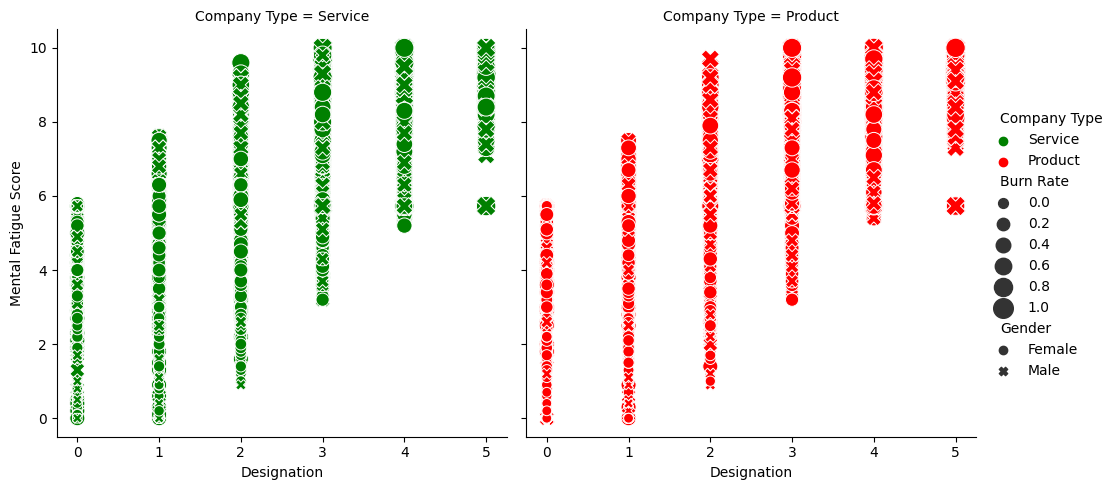

In [ ]:
sns.relplot(
    data = df,x="Designation",y="Mental Fatigue Score",
    col ="Company Type", hue ="Company Type",size="Burn Rate",
    style="Gender",palette=["g","r"],sizes=(50,200)

)

**converting the categorical column into numerical column**
- we use the Label Encoder method

In [ ]:
label_encode = preprocessing.LabelEncoder()

df['GenderLabel'] = label_encode.fit_transform(df["Gender"].values)
df['WFH Setup AvailableLabel'] = label_encode.fit_transform(df["WFH Setup Available"].values)
df['Company_TypeLabel'] = label_encode.fit_transform(df["Company Type"].values)

In [ ]:
df.sample(5)

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
2964       2008-08-05    Male      Product                  No            4   
8133       2008-03-05    Male      Service                 Yes            3   
4035       2008-05-01    Male      Service                  No            2   
17305      2008-11-25  Female      Product                 Yes            1   
11781      2008-11-05  Female      Service                  No            2   

       Resource Allocation  Mental Fatigue Score  Burn Rate  GenderLabel  \
2964              6.000000                   7.1       0.66            1   
8133              6.000000                   7.1       0.60            1   
4035              4.481398                   8.1       0.68            1   
17305             3.000000                   6.0       0.43            0   
11781             3.000000                   4.9       0.31            0   

       WFH Setup AvailableLabel  Company_TypeLabel  
2964                          0                  0  
8133                          1                  1  
4035                          0                  1  
17305                         1                  0  
11781                         0                  1

**Spliting the Input columns and target columns**

In [ ]:
X = df.drop(columns=['Burn Rate','Date of Joining',"Gender",'Company Type','WFH Setup Available'])
y = df["Burn Rate"]

In [ ]:
X.shape

(22750, 6)

**Performing the dimension reduction**
- here i will use the PCA techniques

In [ ]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [ ]:
print("before",X.shape,"after",X_pca.shape,)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

before (22750, 6) after (22750, 4)
[0.78371089 0.11113597 0.03044541 0.02632422]
4


**Spliting training and testing data**
- using train_test_split function

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


**Applying Alogrithm**
- using RandomForestRegressor algorithm

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

**Finding the Accuracy score**

In [ ]:
train_y_pred = rf_model.predict(X_train)
train_score = r2_score(Y_train,train_y_pred)
test_y_pred = rf_model.predict(X_test)
test_score = r2_score(Y_test,test_y_pred)

print("Accuracy Score of train data : "+str(round(100*train_score,3))+"%")
print("Accuracy Score of test data : "+str(round(100*test_score,3))+"%")

Accuracy Score of train data : 91.2%
Accuracy Score of test data : 83.89%
